In [1]:
# Import required libraries and dependencies
import warnings
warnings.simplefilter(action='ignore')

import pandas as pd
import numpy as np
import hvplot.pandas
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno 

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

<div> 
<h3 style="font-size: 22px; font-weight: bold; color: #FF5733 ; margin-bottom: 10px;"> Understanding the Raw Dataset </h3>
    
</div>
**Columns**

1. State: Stores someone's geographic information. 

2. Sex: Indicates someone's gender. 

3. GeneralHealth: Describes someone's overall health condition. 

4. PhysicalHealthDays: Describes someone's physical health condition.

5. MentalHealthDays: Indicates someone's mental health condition. 

6. LastCheckupTime: Contains the information of the last health check 

7. PhysicalActivities: Indicates how active someone is in physical activities.

8. SleepHours: Someone's sleep time, which could be an indicator of sleep health. 

9. RemovedTeeth: Contains information about whether someone has removed teeth or not.

10. HadHeartAttack: This column stores information about whether someone has heart disease or not. 

11. HadAngina: This column stores information about whether someone has angina (A type of chest pain caused by reduced blood flow to the heart) or not.

12. HadStroke: Contains information about whether someone has had a stroke or not. 

13. HadAsthma: Stores information about whether someone has asthma or not.

14. HadSkinCancer: Stores information about whether someone has skin cancer or not. 

15. HadCOPD: Stores information about whether someone has COPD (Symptoms include cough, sometimes with phlegm, difficulty breathing) or not

16. HadDepressiveDisorder: Stores information about whether someone has depressive disorder or not 

17. HadKidneyDisease: Contains information about whether someone has kidney disease or not. 

18. HadArthritis: Contains information about whether someone has arthritis (inflammation or swelling of one or more joints) or not

19. HadDiabetes: Stores information about whether someone has diabetes or not. 

20. DeafOrHardOfHearing: Stores information about whether someone has difficulty hearing or not.

21. BlindOrVisionDifficulty: Stores information about whether someone has difficulty in vision or not.

22. DifficultyConcentrating: Stores information about whether someone has difficulty concentrating or not. 

23. DifficultyWalking: Stores information about whether someone has difficulty walking or not.

24. DifficultyDressingBathing: Stores information about whether someone has difficulty dressing/bathing or not. 

25. DifficultyErrands: Stores information about whether someone has difficulty errands or not.

26. SmokerStatus: Stores information about whether someone smokes or not.

27. ECigaretteUsage: Stores information about whether someone use electronic cigarette or not. 

28. ChestScan: Stores information about whether someone had chest scanned or not.

29. RaceEthnicityCategory: Stores information about someone's race or ethnicity. 

30. AgeCategory: Groups someone's age into specific categories.

31. HeightInMeters: Stores someone's height information (in meters).

32. WeightInKilograms: Stores someone's weight information (in kilograms).

33. BMI: Stands for Body Mass Index, which measures the proportion of weight to height for an individual. 

34. AlcoholDrinkers: Information about whether someone consumes alcohol or not.

35. HIVTesting: Stores information about whether someone had HIV testing or not. 

36. FluVaxLast12: Stores information about whether someone had flu vacination in the last 12 months or not.  

37. PneumoVaxEver: Stores information about whether someone ever had Pneumo Vaccination or not.  

38. TetanusLast10Tdap: Stores information about whether someone ever had Tdap Vaccination or not. 

39. HighRiskLastYear: Stores information about whether someone was in high risk or not. 

40. CovidPos: Stores information about whether someone had Covid or not. 

# 1. Loading the Dataset from CSV

In [2]:
# Load the data into a Pandas DataFrame
df = pd.read_csv("heart_2022_with_nans.csv")
# Display sample data
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


# 2. Exploring the Dataset

<Axes: >

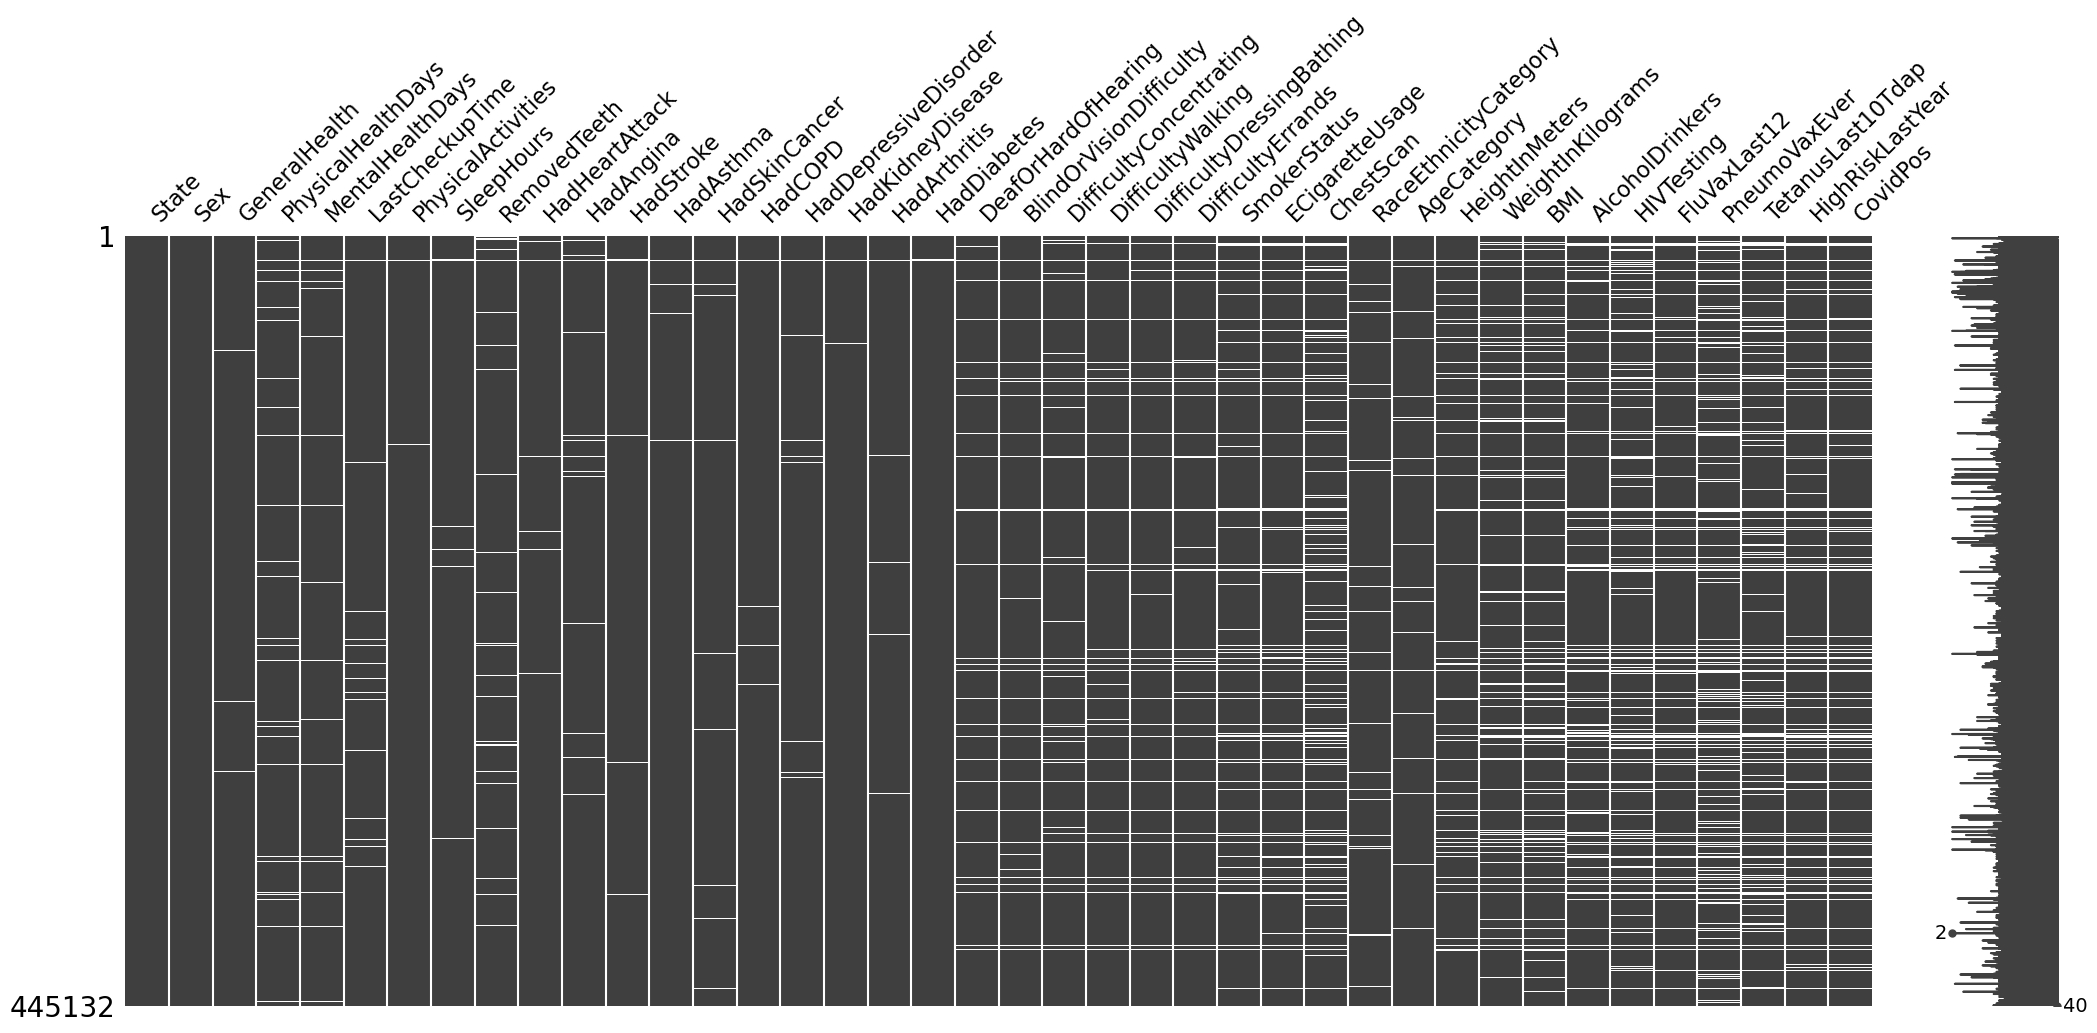

In [3]:
# Check he missing data
%matplotlib inline
msno.matrix(df)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [5]:
# Statistical Analysis for numerical data in dataset
print(f"Summary of the Dataset with Numerical Columns")
df.describe()

Summary of the Dataset with Numerical Columns


,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [7]:
# Find the duplicated values
df.duplicated().sum()

# Drop duplicated values
df.drop_duplicates(inplace=True)

# Check again information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444975 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      444975 non-null  object 
 1   Sex                        444975 non-null  object 
 2   GeneralHealth              443782 non-null  object 
 3   PhysicalHealthDays         434053 non-null  float64
 4   MentalHealthDays           435913 non-null  float64
 5   LastCheckupTime            436674 non-null  object 
 6   PhysicalActivities         443887 non-null  object 
 7   SleepHours                 439527 non-null  float64
 8   RemovedTeeth               433620 non-null  object 
 9   HadHeartAttack             441915 non-null  object 
 10  HadAngina                  440575 non-null  object 
 11  HadStroke                  443423 non-null  object 
 12  HadAsthma                  443207 non-null  object 
 13  HadSkinCancer              441837 

In [8]:
# How many distinct values in each column
for column in df.columns:
    print(f"{column}: {len(df[column].unique())} distinct values")

State: 54 distinct values
Sex: 2 distinct values
GeneralHealth: 6 distinct values
PhysicalHealthDays: 32 distinct values
MentalHealthDays: 32 distinct values
LastCheckupTime: 5 distinct values
PhysicalActivities: 3 distinct values
SleepHours: 25 distinct values
RemovedTeeth: 5 distinct values
HadHeartAttack: 3 distinct values
HadAngina: 3 distinct values
HadStroke: 3 distinct values
HadAsthma: 3 distinct values
HadSkinCancer: 3 distinct values
HadCOPD: 3 distinct values
HadDepressiveDisorder: 3 distinct values
HadKidneyDisease: 3 distinct values
HadArthritis: 3 distinct values
HadDiabetes: 5 distinct values
DeafOrHardOfHearing: 3 distinct values
BlindOrVisionDifficulty: 3 distinct values
DifficultyConcentrating: 3 distinct values
DifficultyWalking: 3 distinct values
DifficultyDressingBathing: 3 distinct values
DifficultyErrands: 3 distinct values
SmokerStatus: 5 distinct values
ECigaretteUsage: 5 distinct values
ChestScan: 3 distinct values
RaceEthnicityCategory: 6 distinct values
AgeC

In [9]:
# Finding NAN values
nan_values = df.isna().sum().sort_values(ascending=False)
nan_values_percentage = (nan_values/df.shape[0])*100

# Output the DataFrame with two columns nan_values and nan_values_percentage
pd.concat([nan_values, nan_values_percentage], axis=1).rename(columns= {0:"NaN Values", 1:"(%) of NaN Values"}).round(2)

,NaN Values,(%) of NaN Values
TetanusLast10Tdap,82370,18.51
PneumoVaxEver,76894,17.28
HIVTesting,65981,14.83
ChestScan,55900,12.56
CovidPos,50618,11.38
HighRiskLastYear,50477,11.34
BMI,48659,10.94
FluVaxLast12,46975,10.56
AlcoholDrinkers,46428,10.43
WeightInKilograms,41931,9.42


In [11]:
# Remove unneccessary columns using drop()
columns_to_drop = [
    'LastCheckupTime', 'RemovedTeeth', 'HadCOPD', 
    'HadArthritis', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
    'DifficultyConcentrating', 
    'DifficultyDressingBathing', 'DifficultyErrands', 
    'HeightInMeters', 'WeightInKilograms', 
    'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
    'HighRiskLastYear', 'CovidPos'
]
df_drop = df.drop(columns=columns_to_drop)
df_drop

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,...,HadKidneyDisease,HadDiabetes,DifficultyWalking,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,BMI,AlcoholDrinkers
0,Alabama,Female,Very good,0.0,0.0,No,8.0,No,No,No,...,No,Yes,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",Age 80 or older,NaN,No
1,Alabama,Female,Excellent,0.0,0.0,No,6.0,No,No,No,...,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,26.57,No
2,Alabama,Female,Very good,2.0,3.0,Yes,5.0,No,No,No,...,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,25.61,No
3,Alabama,Female,Excellent,0.0,0.0,Yes,7.0,No,No,No,...,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",NaN,23.30,No
4,Alabama,Female,Fair,2.0,0.0,Yes,9.0,No,No,No,...,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,21.77,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,0.0,3.0,Yes,6.0,No,No,No,...,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 18 to 24,25.63,NaN
445128,Virgin Islands,Female,Excellent,2.0,2.0,Yes,7.0,No,No,No,...,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"Black only, Non-Hispanic",Age 50 to 54,28.66,No
445129,Virgin Islands,Female,Poor,30.0,30.0,No,5.0,No,No,No,...,No,No,No,Current smoker - now smokes every day,Use them some days,NaN,NaN,Age 65 to 69,17.23,NaN
445130,Virgin Islands,Male,Very good,0.0,0.0,No,5.0,Yes,No,No,...,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 70 to 74,32.55,No


In [12]:
# Check columns names after dropping
df_drop.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'PhysicalActivities', 'SleepHours',
       'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadDiabetes', 'DifficultyWalking', 'SmokerStatus', 'ECigaretteUsage',
       'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'BMI',
       'AlcoholDrinkers'],
      dtype='object')

In [13]:
# Reorganize columns order
column_order = [
        # User Info
        'State', 'Sex', 'AgeCategory', 'RaceEthnicityCategory','BMI', 
        # General health
        'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'PhysicalActivities', 'ChestScan',
        # risks
        'SleepHours', 'DifficultyWalking', 'SmokerStatus', 'ECigaretteUsage', 'AlcoholDrinkers', 
        # Medication History
        'HadHeartAttack', 'HadAngina',  'HadStroke', 'HadAsthma',
        'HadSkinCancer', 'HadDepressiveDisorder', 'HadKidneyDisease','HadDiabetes', 
        ]
df_drop = df_drop[column_order]
df_drop

,State,Sex,AgeCategory,RaceEthnicityCategory,BMI,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,ChestScan,...,ECigaretteUsage,AlcoholDrinkers,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadDepressiveDisorder,HadKidneyDisease,HadDiabetes
0,Alabama,Female,Age 80 or older,"White only, Non-Hispanic",NaN,Very good,0.0,0.0,No,No,...,Not at all (right now),No,No,No,No,No,No,No,No,Yes
1,Alabama,Female,Age 80 or older,"White only, Non-Hispanic",26.57,Excellent,0.0,0.0,No,No,...,Never used e-cigarettes in my entire life,No,No,No,No,No,Yes,No,No,No
2,Alabama,Female,Age 55 to 59,"White only, Non-Hispanic",25.61,Very good,2.0,3.0,Yes,No,...,Never used e-cigarettes in my entire life,No,No,No,No,No,Yes,No,No,No
3,Alabama,Female,NaN,"White only, Non-Hispanic",23.30,Excellent,0.0,0.0,Yes,Yes,...,Never used e-cigarettes in my entire life,No,No,No,No,Yes,No,No,No,No
4,Alabama,Female,Age 40 to 44,"White only, Non-Hispanic",21.77,Fair,2.0,0.0,Yes,Yes,...,Never used e-cigarettes in my entire life,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Age 18 to 24,"Black only, Non-Hispanic",25.63,Good,0.0,3.0,Yes,Yes,...,Never used e-cigarettes in my entire life,NaN,No,No,No,Yes,No,Yes,No,No
445128,Virgin Islands,Female,Age 50 to 54,"Black only, Non-Hispanic",28.66,Excellent,2.0,2.0,Yes,No,...,Never used e-cigarettes in my entire life,No,No,No,No,No,No,No,No,No
445129,Virgin Islands,Female,Age 65 to 69,NaN,17.23,Poor,30.0,30.0,No,NaN,...,Use them some days,NaN,No,No,No,No,No,No,No,No
445130,Virgin Islands,Male,Age 70 to 74,"Black only, Non-Hispanic",32.55,Very good,0.0,0.0,No,Yes,...,Never used e-cigarettes in my entire life,No,Yes,No,No,Yes,No,No,No,No


In [14]:
# Renaming columns using a dictionary
df_drop = df_drop.rename(columns={
    'AgeCategory': "Age", 
    'RaceEthnicityCategory': "Race",
    'GeneralHealth': "GenHealth",
    'PhysicalHealthDays': "PhysicalHealth",
    'PhysicalActivities': "PhysicalActivity",
    'MentalHealthDays': "MentalHealth",
    'HadAngina': "Angina",
    'HadHeartAttack': "HeartAttack",
    'HadStroke': "Stroke",
    'HadAsthma': "Asthma",
    'HadSkinCancer': "SkinCancer",
    'HadDepressiveDisorder': "Depressed",
    'HadKidneyDisease': "KidneyDisease",
    'DifficultyWalking': "DiffWalking",
    'HadDiabetes': "Diabetes",
    'SmokerStatus': "Smoking",
    'AlcoholDrinkers': "Drinking"
})
df_drop

,State,Sex,Age,Race,BMI,GenHealth,PhysicalHealth,MentalHealth,PhysicalActivity,ChestScan,...,ECigaretteUsage,Drinking,HeartAttack,Angina,Stroke,Asthma,SkinCancer,Depressed,KidneyDisease,Diabetes
0,Alabama,Female,Age 80 or older,"White only, Non-Hispanic",NaN,Very good,0.0,0.0,No,No,...,Not at all (right now),No,No,No,No,No,No,No,No,Yes
1,Alabama,Female,Age 80 or older,"White only, Non-Hispanic",26.57,Excellent,0.0,0.0,No,No,...,Never used e-cigarettes in my entire life,No,No,No,No,No,Yes,No,No,No
2,Alabama,Female,Age 55 to 59,"White only, Non-Hispanic",25.61,Very good,2.0,3.0,Yes,No,...,Never used e-cigarettes in my entire life,No,No,No,No,No,Yes,No,No,No
3,Alabama,Female,NaN,"White only, Non-Hispanic",23.30,Excellent,0.0,0.0,Yes,Yes,...,Never used e-cigarettes in my entire life,No,No,No,No,Yes,No,No,No,No
4,Alabama,Female,Age 40 to 44,"White only, Non-Hispanic",21.77,Fair,2.0,0.0,Yes,Yes,...,Never used e-cigarettes in my entire life,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Age 18 to 24,"Black only, Non-Hispanic",25.63,Good,0.0,3.0,Yes,Yes,...,Never used e-cigarettes in my entire life,NaN,No,No,No,Yes,No,Yes,No,No
445128,Virgin Islands,Female,Age 50 to 54,"Black only, Non-Hispanic",28.66,Excellent,2.0,2.0,Yes,No,...,Never used e-cigarettes in my entire life,No,No,No,No,No,No,No,No,No
445129,Virgin Islands,Female,Age 65 to 69,NaN,17.23,Poor,30.0,30.0,No,NaN,...,Use them some days,NaN,No,No,No,No,No,No,No,No
445130,Virgin Islands,Male,Age 70 to 74,"Black only, Non-Hispanic",32.55,Very good,0.0,0.0,No,Yes,...,Never used e-cigarettes in my entire life,No,Yes,No,No,Yes,No,No,No,No


In [ ]:
# Plot the distribution of NaN Values
df_drop.isna().sum().sort_values().plot(kind="barh")
plt.show()

In [15]:
# Remove the missing values
df_drop = df_drop.dropna()

# Check again the missing values
df_drop.isna().sum()

State               0
Sex                 0
Age                 0
Race                0
BMI                 0
GenHealth           0
PhysicalHealth      0
MentalHealth        0
PhysicalActivity    0
ChestScan           0
SleepHours          0
DiffWalking         0
Smoking             0
ECigaretteUsage     0
Drinking            0
HeartAttack         0
Angina              0
Stroke              0
Asthma              0
SkinCancer          0
Depressed           0
KidneyDisease       0
Diabetes            0
dtype: int64

<Axes: >

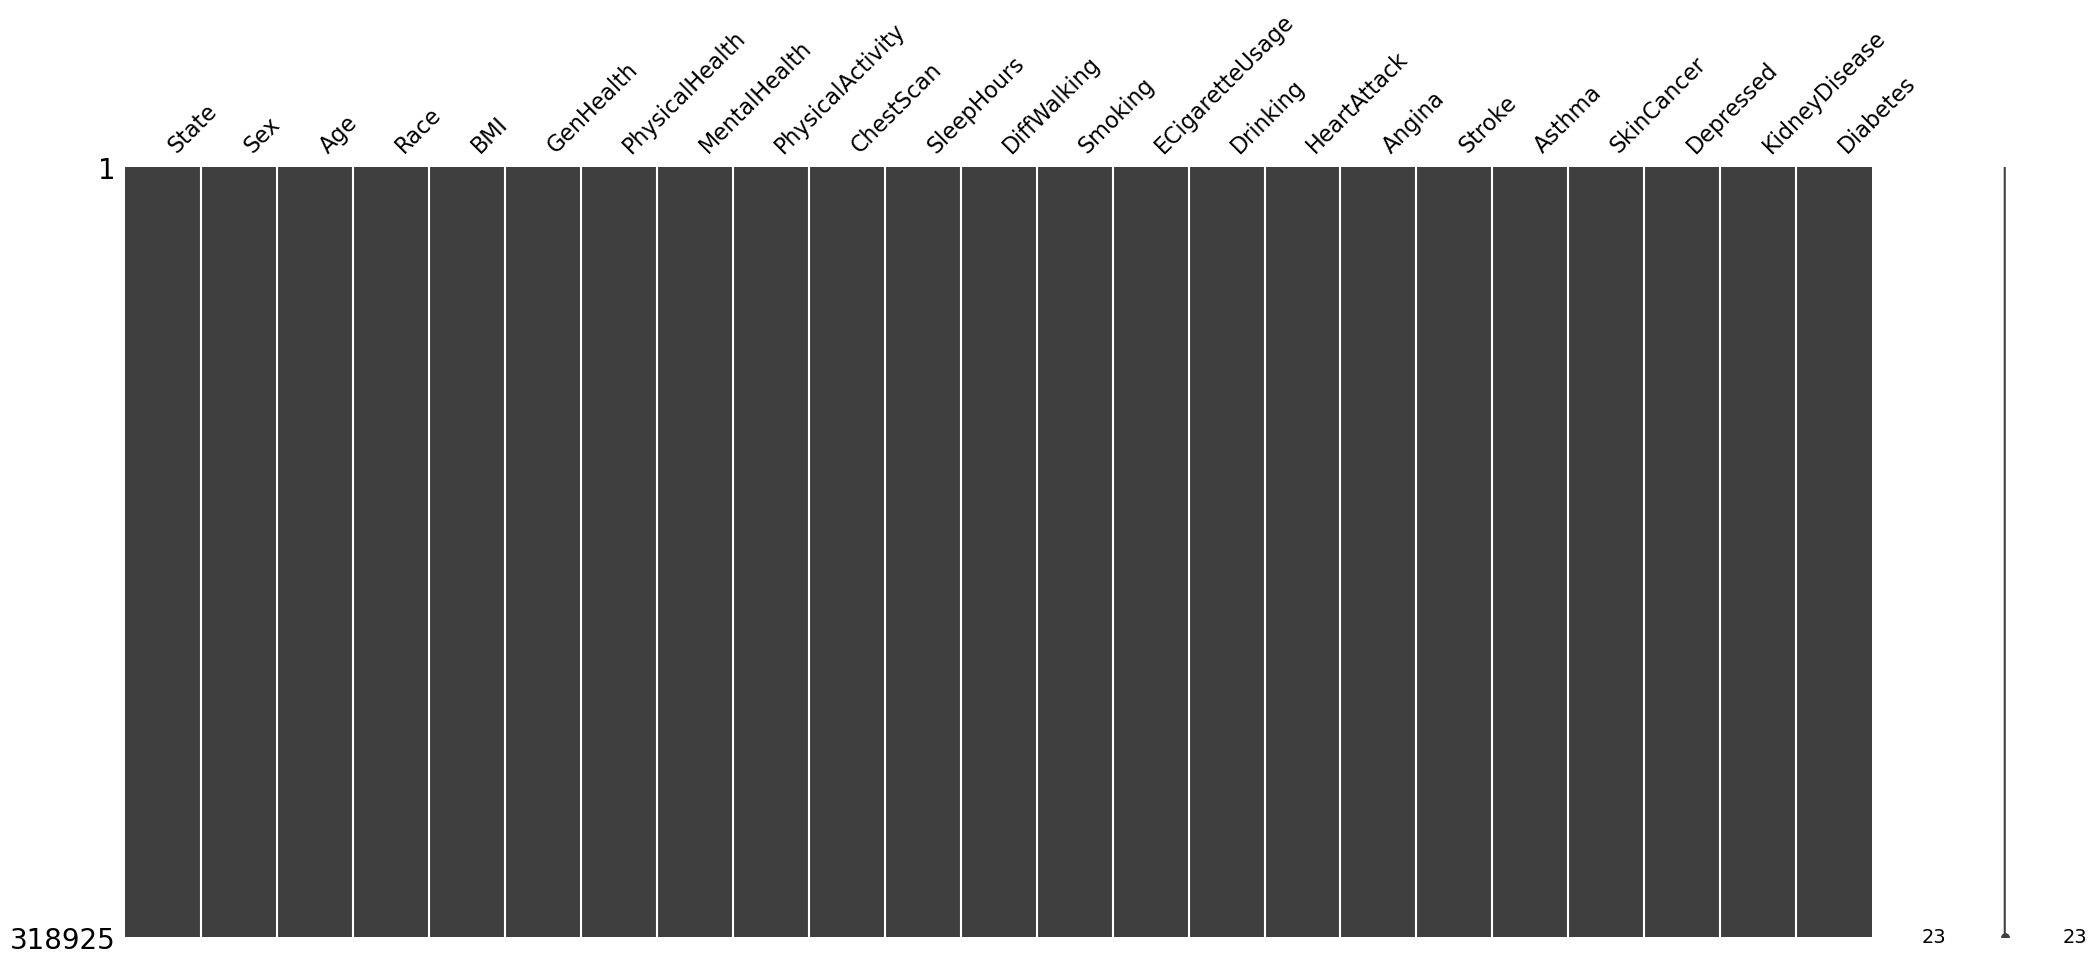

In [16]:
# Check he missing data
msno.matrix(df_drop)

In [17]:

# Statistical Analysis for numerical data in dataset
df_drop.describe()

,BMI,PhysicalHealth,MentalHealth,SleepHours
count,318925.000000,318925.000000,318925.000000,318925.000000
mean,28.569902,4.147646,4.317178,7.022109
std,6.515587,8.433619,8.227483,1.443658
min,12.020000,0.000000,0.000000,1.000000
25%,24.190000,0.000000,0.000000,6.000000
50%,27.440000,0.000000,0.000000,7.000000
75%,31.750000,3.000000,5.000000,8.000000
max,97.650000,30.000000,30.000000,24.000000


In [19]:
df_drop.dtypes

State                object
Sex                  object
Age                  object
Race                 object
BMI                 float64
GenHealth            object
PhysicalHealth      float64
MentalHealth        float64
PhysicalActivity     object
ChestScan            object
SleepHours          float64
DiffWalking          object
Smoking              object
ECigaretteUsage      object
Drinking             object
HeartAttack          object
Angina               object
Stroke               object
Asthma               object
SkinCancer           object
Depressed            object
KidneyDisease        object
Diabetes             object
dtype: object

In [30]:
df_drop.describe(include="object")

,State,Sex,Age,Race,GenHealth,PhysicalActivity,ChestScan,DiffWalking,Smoking,ECigaretteUsage,Drinking,HeartAttack,Angina,Stroke,Asthma,SkinCancer,Depressed,KidneyDisease,Diabetes
count,318925,318925,318925,318925,318925,318925,318925,318925,318925,318925,318925,318925,318925,318925,318925,318925,318925,318925,318925
unique,54,2,13,5,5,2,2,2,4,4,2,2,2,2,2,2,2,2,4
top,Washington,Female,65-69,White,Very good,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,No,No,No,No,No,No,No,No
freq,19036,163410,34885,241132,112204,247712,185307,272507,192467,243692,176142,301979,300008,306075,271260,292637,252214,304756,266735


In [32]:
# Print out all description by columns
# Use FOR loop to iterate over columns

for col in df_drop.describe(include="object").columns:
    print(f"Column Name: {col} with {len(df_drop[col].unique())} distinct values")
    print(df_drop[col].unique())
    print("____________________________________")

Column Name: State with 54 distinct values
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']
____________________________________
Column Name: Sex with 2 distinct values
['Female' 'Male']
____________________________________
Column Name: Age with 13 distinct values
['80 or older' '55-59' '40-44' '65-69' '70-74' '60-64' '75-79' '50-54'
 '45-49' '35-39' '30-34' '25-29' '18-24']
___________________________

In [ ]:
# Identify binary columns
# The condition checks if the column has exactly 2 unique values using the nunique() 
# binary_cols = [col for col in df.columns if df[col].nunique() == 2]
# binary_cols

In [ ]:
# Convert and verify binary columns
# all_binary = True

# for col in binary_cols:
#     unique_values = df[col].unique()
#     if set(unique_values) != {0, 1}:
#         mapping = {unique_values[0]: 0, unique_values[1]: 1}
#         df[col] = df[col].map(mapping)
    
#     # Verify conversion
#     if set(df[col].unique()) != {0, 1}:
#         all_binary = False
#         print(f"Column {col} has non-binary values: {set(df[col].unique())}")

# if all_binary:
#     print("All binary columns have been successfully converted to 0 and 1.")
# else:
#     print("Some columns still have non-binary values.")

In [22]:
# Find object/category columns
cat_cols= df_drop.select_dtypes(include=["object", "category"]).columns.tolist()
cat_cols

['State',
 'Sex',
 'Age',
 'Race',
 'GenHealth',
 'PhysicalActivity',
 'ChestScan',
 'DiffWalking',
 'Smoking',
 'ECigaretteUsage',
 'Drinking',
 'HeartAttack',
 'Angina',
 'Stroke',
 'Asthma',
 'SkinCancer',
 'Depressed',
 'KidneyDisease',
 'Diabetes']

## Since, some categorical attributes are overlapping --> Cleaning Needed

In [24]:
# Check the "Race" category
unique_race = df_drop["Race"].value_counts()
print(unique_race)

Race
White only, Non-Hispanic         241132
Hispanic                          29942
Black only, Non-Hispanic          24334
Other race only, Non-Hispanic     16251
Multiracial, Non-Hispanic          7266
Name: count, dtype: int64


In [25]:
# Define re-names
rename_race = {
    "White only, Non-Hispanic": "White",
    "Black only, Non-Hispanic" : "Black",
    "Other race only, Non-Hispanic": "Other",
    "Multiracial, Non-Hispanic": "Multiracial"
}

# Replace values in the "Race" column
df_drop["Race"] = df_drop["Race"].replace(rename_race)
print(df_drop["Race"].value_counts())

Race
White          241132
Hispanic        29942
Black           24334
Other           16251
Multiracial      7266
Name: count, dtype: int64


In [26]:
# Check the "Age" category
print(df_drop["Age"].value_counts())

Age
Age 65 to 69       34885
Age 60 to 64       32885
Age 70 to 74       31746
Age 55 to 59       27413
Age 50 to 54       25025
Age 80 or older    23448
Age 75 to 79       23051
Age 40 to 44       22339
Age 45 to 49       21293
Age 35 to 39       21157
Age 18 to 24       20312
Age 30 to 34       18892
Age 25 to 29       16479
Name: count, dtype: int64


In [27]:
df_drop["Age"] = (df_drop["Age"]
                     .str.replace(" to ", "-")
                     .str.replace("Age ", ""))

print(df_drop["Age"].value_counts())

Age
65-69          34885
60-64          32885
70-74          31746
55-59          27413
50-54          25025
80 or older    23448
75-79          23051
40-44          22339
45-49          21293
35-39          21157
18-24          20312
30-34          18892
25-29          16479
Name: count, dtype: int64


In [28]:
# Check unique values of Diabetes
print(df_drop["Diabetes"].value_counts())

Diabetes
No                                         266735
Yes                                         42432
No, pre-diabetes or borderline diabetes      7109
Yes, but only during pregnancy (female)      2649
Name: count, dtype: int64


In [29]:
rename_diabetes = {
    "No, pre-diabetes or borderline diabetes": "No, borderline diabetes",
    "Yes, but only during pregnancy (female)": "Yes, during pregnancy"
}
df_drop["Diabetes"] = df_drop["Diabetes"].replace(rename_diabetes)

# Check again
# Check unique values of Diabetes
print(df_drop["Diabetes"].value_counts())

Diabetes
No                         266735
Yes                         42432
No, borderline diabetes      7109
Yes, during pregnancy        2649
Name: count, dtype: int64


In [ ]:
# Check Correlation Matrix for all numerical columns
# num_cols = df[['Sex', 'PhysicalHealthDays',
#        'MentalHealthDays', 'PhysicalActivities',
#        'SleepHours', 'HadHeartAttack', 'HadAngina',
#        'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
#        'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
#        'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
#        'DifficultyConcentrating', 'DifficultyWalking',
#        'DifficultyDressingBathing', 'DifficultyErrands', 
#        'ChestScan',  
#        'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
#        'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 
#        'HighRiskLastYear']]
# num_cols.corr()

In [ ]:
# Plot the Heatmap of correlation matrix
# plt.figure(figsize=(30,20))
# sns.heatmap(num_cols.corr(), cmap='viridis', fmt='.3f', linewidths=1, linecolor='black', annot=True)
# plt.title("Pearson Correlation Heatmap")
# plt.show()

In [ ]:
# Pair plot
# sns.pairplot(num_cols)
# plt.show()

In [ ]:
# num_cols_selected = df[['Sex', 'PhysicalHealthDays',
#        'MentalHealthDays', 'PhysicalActivities',
#        'SleepHours', 'HadHeartAttack', 'HadAngina',
#        'HadStroke', 'HadAsthma', 'HadSkinCancer', 
#        'HadKidneyDisease', 'DifficultyWalking',
#        'ChestScan',  
#        'BMI', 'AlcoholDrinkers', 
#        'HighRiskLastYear']]
# num_cols_selected.corr()

# 3. Exploratory Data Analysis (EDA)

In [33]:
# Find numeric columns
num_cols= df_drop.select_dtypes(include=["number"]).columns.tolist()
num_cols

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepHours']

In [34]:
# Find object/category columns
cat_cols= df_drop.select_dtypes(include=["object", "category"]).columns.tolist()
cat_cols

['State',
 'Sex',
 'Age',
 'Race',
 'GenHealth',
 'PhysicalActivity',
 'ChestScan',
 'DiffWalking',
 'Smoking',
 'ECigaretteUsage',
 'Drinking',
 'HeartAttack',
 'Angina',
 'Stroke',
 'Asthma',
 'SkinCancer',
 'Depressed',
 'KidneyDisease',
 'Diabetes']

## 3.1. Univariate Analysis

### 3.1.1. Numerical Features

Analysis for BMI columns:
Analysis for PhysicalHealth columns:
Analysis for MentalHealth columns:
Analysis for SleepHours columns:


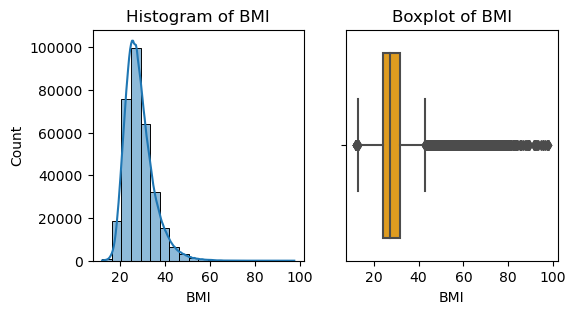

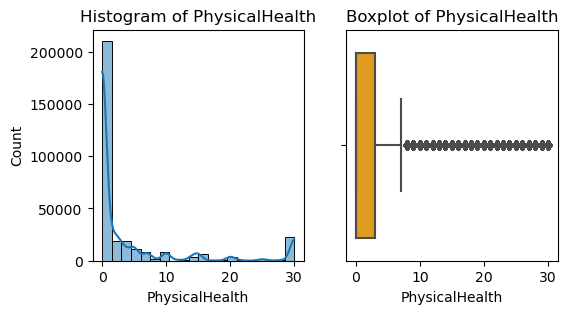

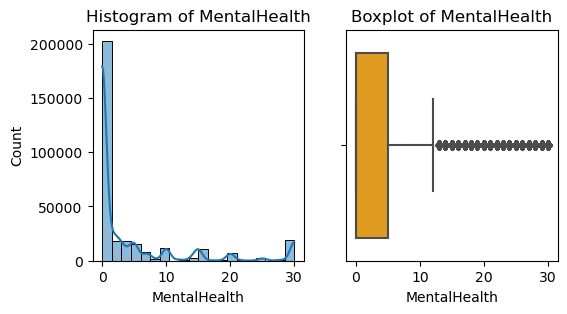

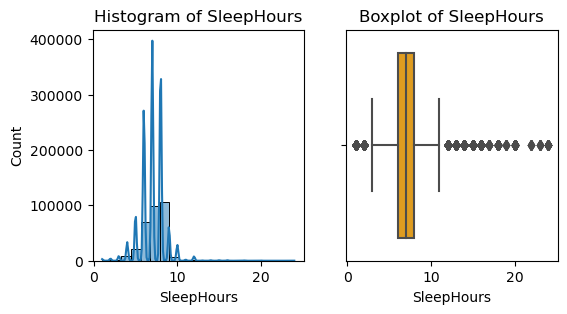

In [44]:
# Define Analysis function of numerical columns
def analysis_num(col):
    fig, ax = plt.subplots(1,2, figsize = (6,3))
    
    sns.histplot(df_drop[col], kde=True, bins=20, ax=ax[0])
    ax[0].set_title(f"Histogram of {col}")

    sns.boxplot(x=df_drop[col], color="orange", ax=ax[1])
    ax[1].set_title(f"Boxplot of {col}")

# FOR LOOPs for each column in numerical columns
for col in num_cols:
    print(f"Analysis for {col} columns:")
    analysis_num(col)

### 3.1.2. Categorical Features

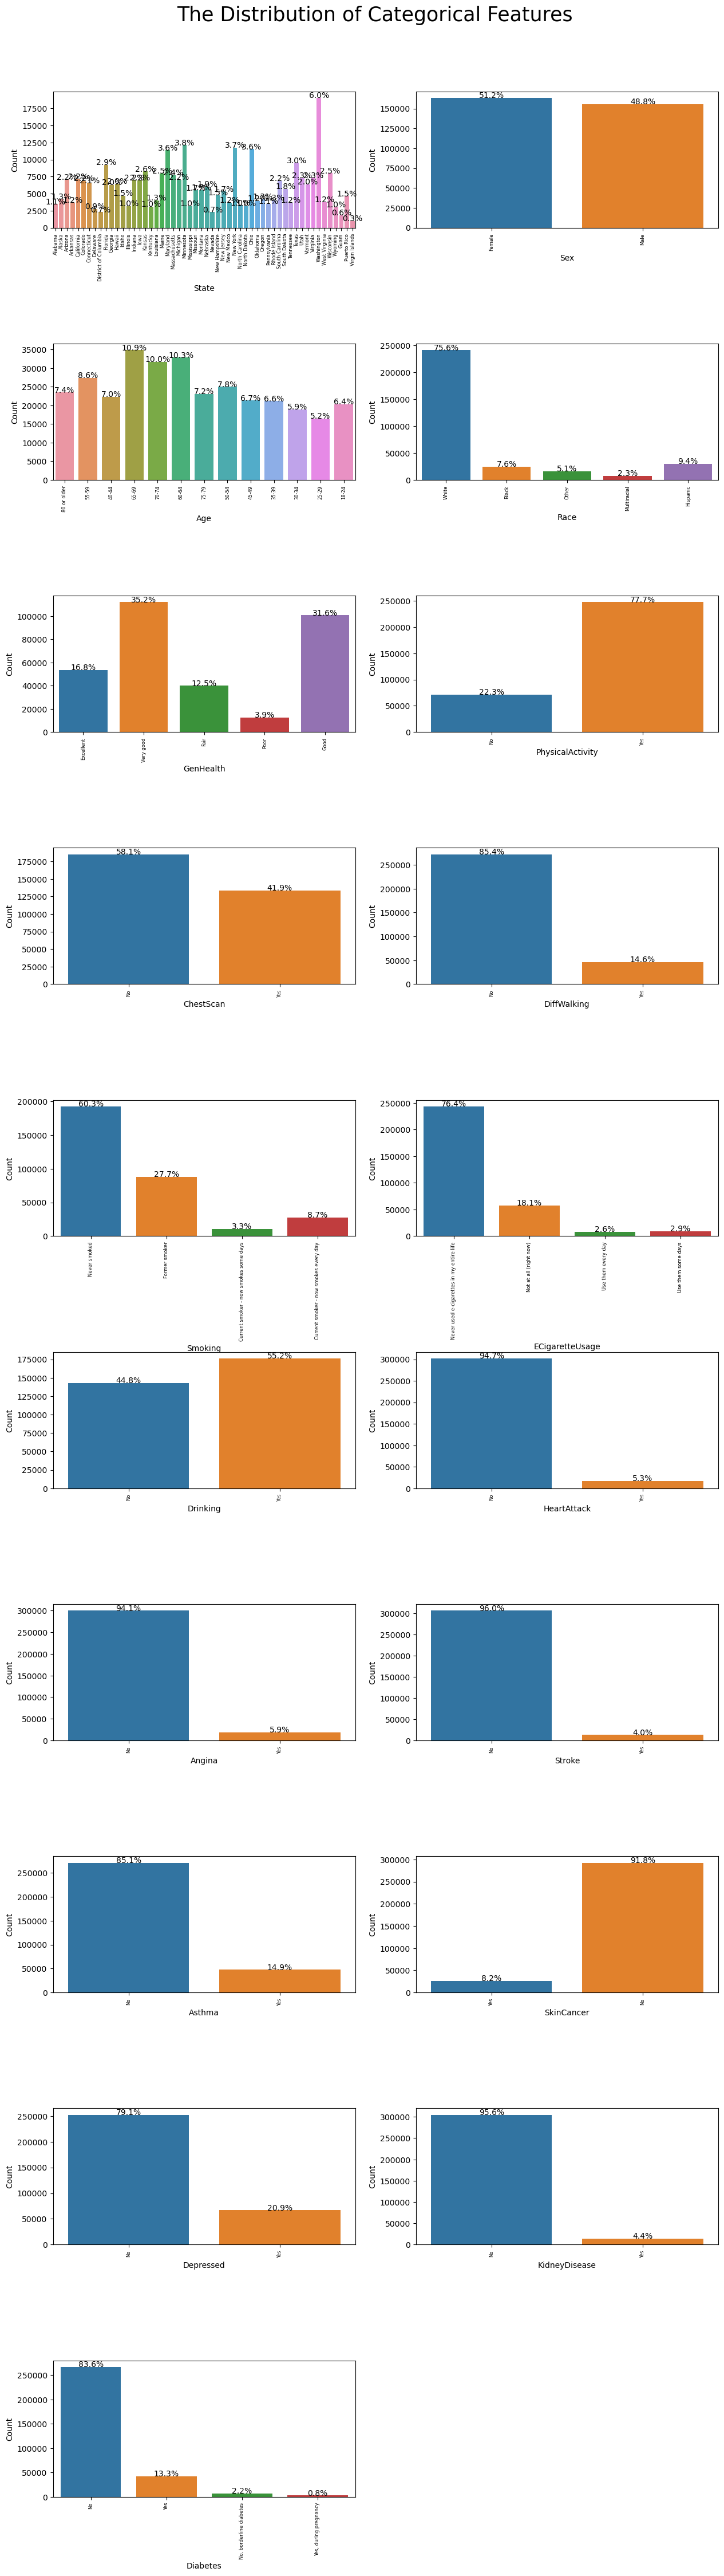

In [86]:
# Determin the number of rows and columns
L = len(cat_cols)
ncol = 2
nrow = int(np.ceil(L / ncol)) # Calculates the number of rows needed to fit all categorical columns

# Create Subplots
fig, axs = plt.subplots(nrow, ncol, figsize=(15, 5 * nrow))
# Adjust the spacing of the subplots
fig.subplots_adjust(top=0.95, hspace=0.85, wspace=0.2)

for i, col in enumerate(cat_cols):
    ax = axs[i // ncol, i % ncol] # determines the row & determines the column, respectively
    sns.countplot(data=df_drop, x=col, ax=ax)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    ax.tick_params(axis='x', rotation=90, labelsize=6)

    # Add labels to bars
    total = float(len(df_drop))
    for percent in ax.patches:
        height = percent.get_height()
        ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")
# Hide the last subplot if the number of columns is odd    
if L % 2 != 0:
    axs[-1, -1].axis('off')

plt.suptitle('The Distribution of Categorical Features', fontsize=25)
plt.show()

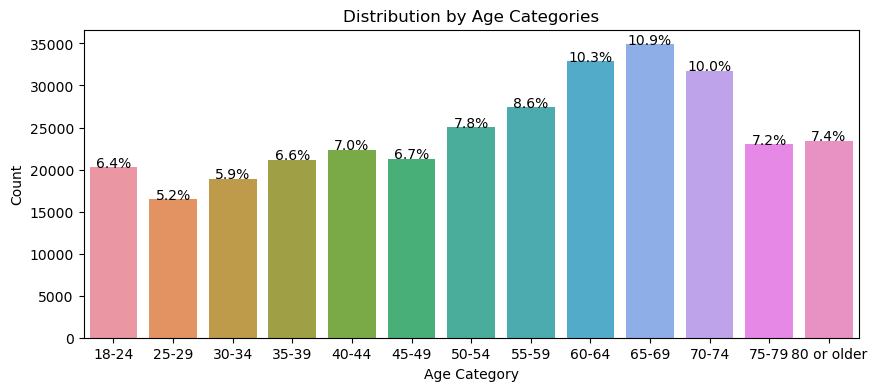

In [88]:
# Set figure styles
plt.figure(figsize=(10,4))

#Plot countplot
ax = sns.countplot(
    data=df_drop, 
    x="Age", 
    order = sorted(df_drop["Age"].unique())
    )

# Customize plot
ax.set(
    xlabel = "Age Category",
    ylabel = "Count",
    title = "Distribution by Age Categories"
)

# Add labels to bars
total = float(len(df_drop))
for percent in ax.patches:
        height = percent.get_height()
        ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")

# Display the plot
plt.show()

### Overall Distribution of Heart Attack

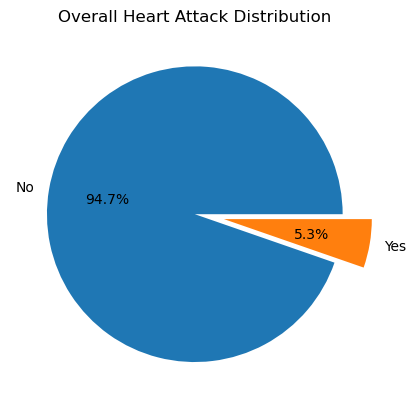

In [90]:
# Heart Attack distribution
heart_attack_rate = df_drop["HeartAttack"].value_counts()
plt.pie(
    heart_attack_rate.values, 
    labels = heart_attack_rate.index,
    autopct = "%.1f%%", 
    explode = [0, 0.2]
    )
plt.title("Overall Heart Attack Distribution")
plt.show()

## 3.2. Bivariate Analysis

### 3.2.1 Analysis by Numerical Features

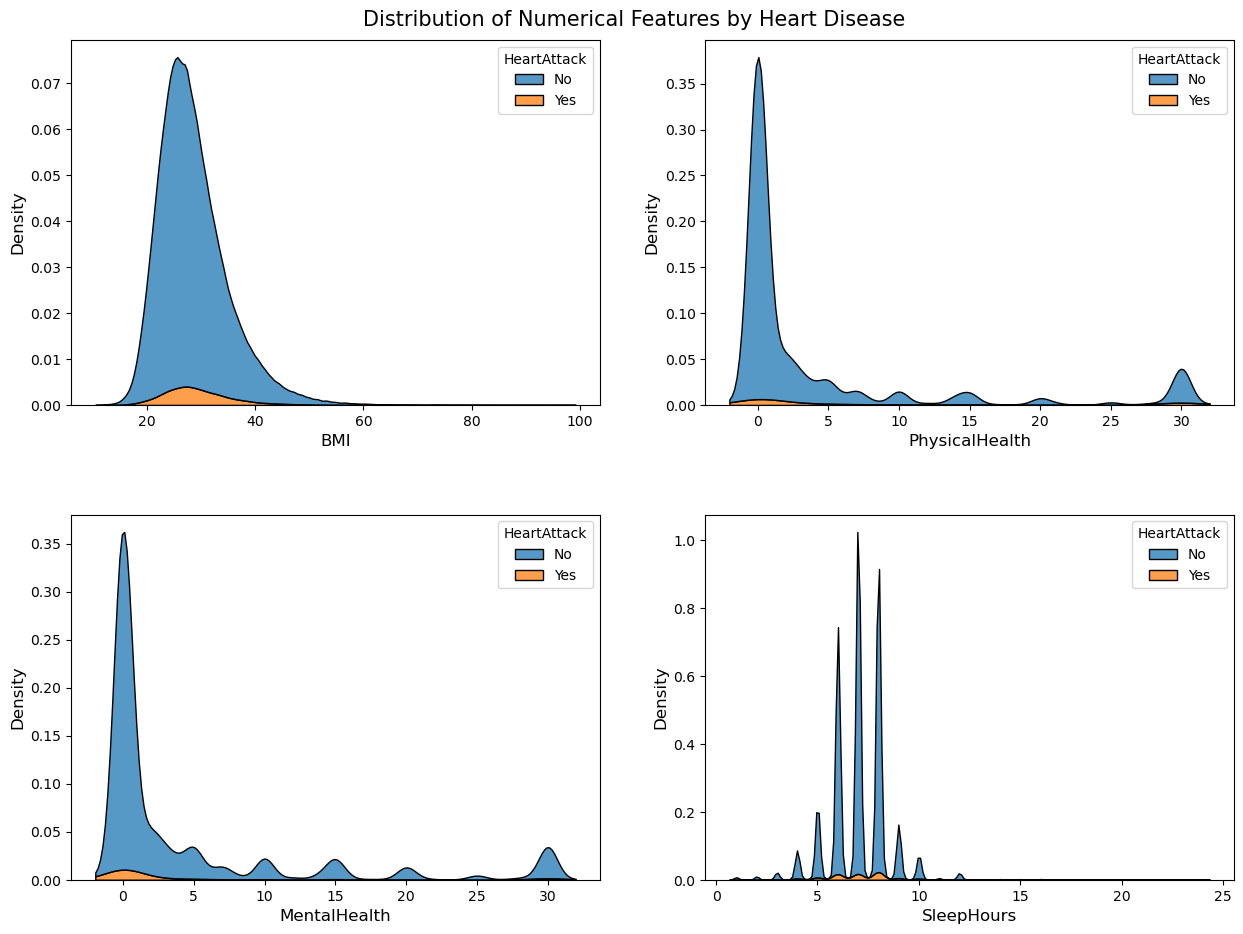

In [120]:
# List of factors to plot
#num_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepHours']

# Determin the number of rows and columns
L = len(num_cols)
ncol = 2
nrow = int(np.ceil(L / ncol)) # Calculates the number of rows needed to fit all categorical columns

# Create Subplots
fig, axs = plt.subplots(nrow, ncol, figsize=(15, 5 * nrow))
# Adjust the spacing of the subplots
fig.subplots_adjust(top=0.95, hspace=0.3, wspace=0.2)

for i, col in enumerate(num_cols):
    sns.kdeplot(data=df_drop, x=col, hue="HeartAttack", multiple="stack", ax=axs.flatten()[i])
    axs.flatten()[i].set_xlabel(col, fontsize=12)
    axs.flatten()[i].set_ylabel("Density", fontsize=12)

plt.suptitle('Distribution of Numerical Features by Heart Disease', fontsize=15)
plt.show()

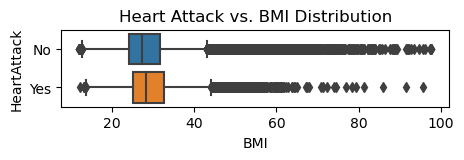

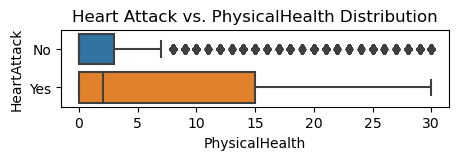

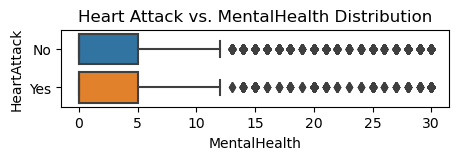

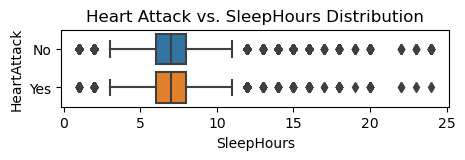

In [152]:
for column in df_drop.describe().columns:
    plt.figure(figsize=(5, 1))
    sns.boxplot(data=df_drop, x=column, y="HeartAttack")
    plt.title(f"Heart Attack vs. {column} Distribution")
    plt.show()

Analysis for BMI columns:
Analysis for PhysicalHealth columns:
Analysis for MentalHealth columns:
Analysis for SleepHours columns:


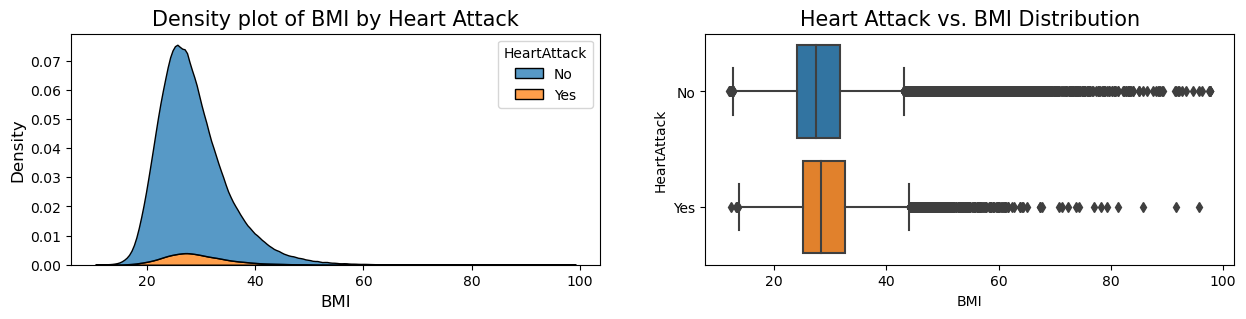

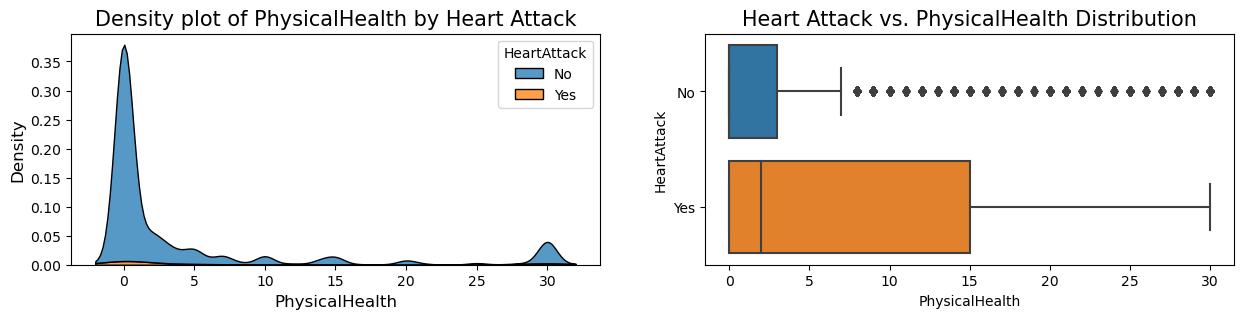

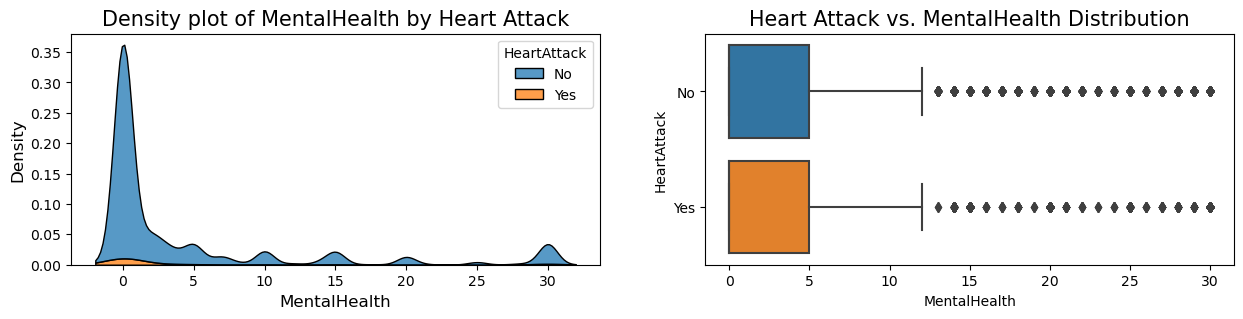

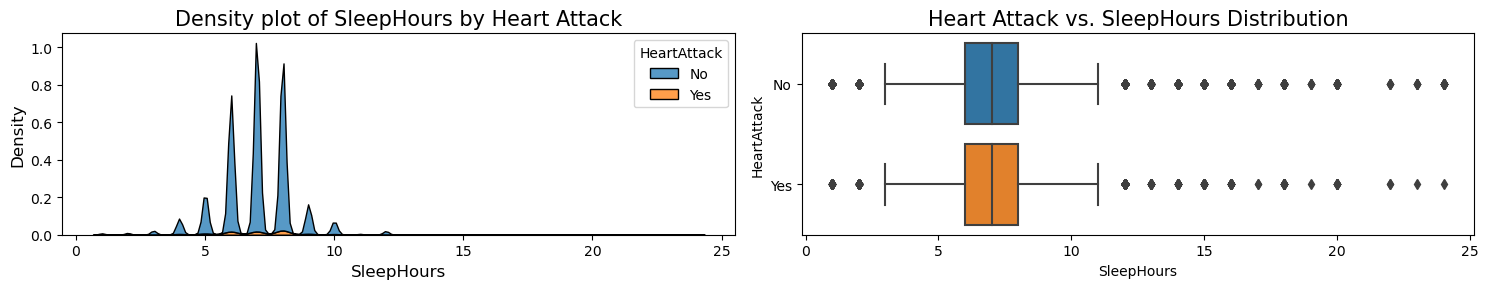

In [178]:
# Define Analysis function of numerical columns
def analysis_num_2(col):
    fig, ax = plt.subplots(1,2, figsize = (15,3))
    
    # KDE Plot
    sns.kdeplot(data=df_drop, x=col, hue="HeartAttack", multiple="stack", ax=ax[0])
    ax[0].set_xlabel(col, fontsize=12)
    ax[0].set_ylabel("Density", fontsize=12)
    ax[0].set_title(f"Density plot of {col} by Heart Attack", fontsize=15)

    # Boxplot
    sns.boxplot(data=df_drop, x=col, y="HeartAttack", ax=ax[1])
    ax[1].set_title(f"Heart Attack vs. {col} Distribution", fontsize=15)

# FOR LOOPs for each column in numerical columns
for col in num_cols:
    print(f"Analysis for {col} columns:")
    analysis_num_2(col)
    
plt.tight_layout()
plt.show()

### 3.2.2 Analysis by Categorical Features

### Heart Attack Among Genders

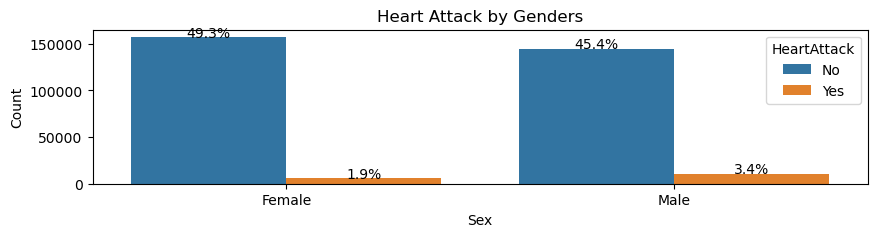

In [179]:
# Set figure styles
plt.figure(figsize=(10,2))

#Plot countplot
ax = sns.countplot(data=df_drop, x="Sex", hue="HeartAttack")

# Customize plot
ax.set(
    ylabel = "Count",
    title = "Heart Attack by Genders"
)
ax.tick_params(axis='x', labelsize=10)
# Add labels to bars
total = float(len(df_drop))
for percent in ax.patches:
    height = percent.get_height()
    ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")

# Display the plot
plt.show()

#### Heart Attack by States

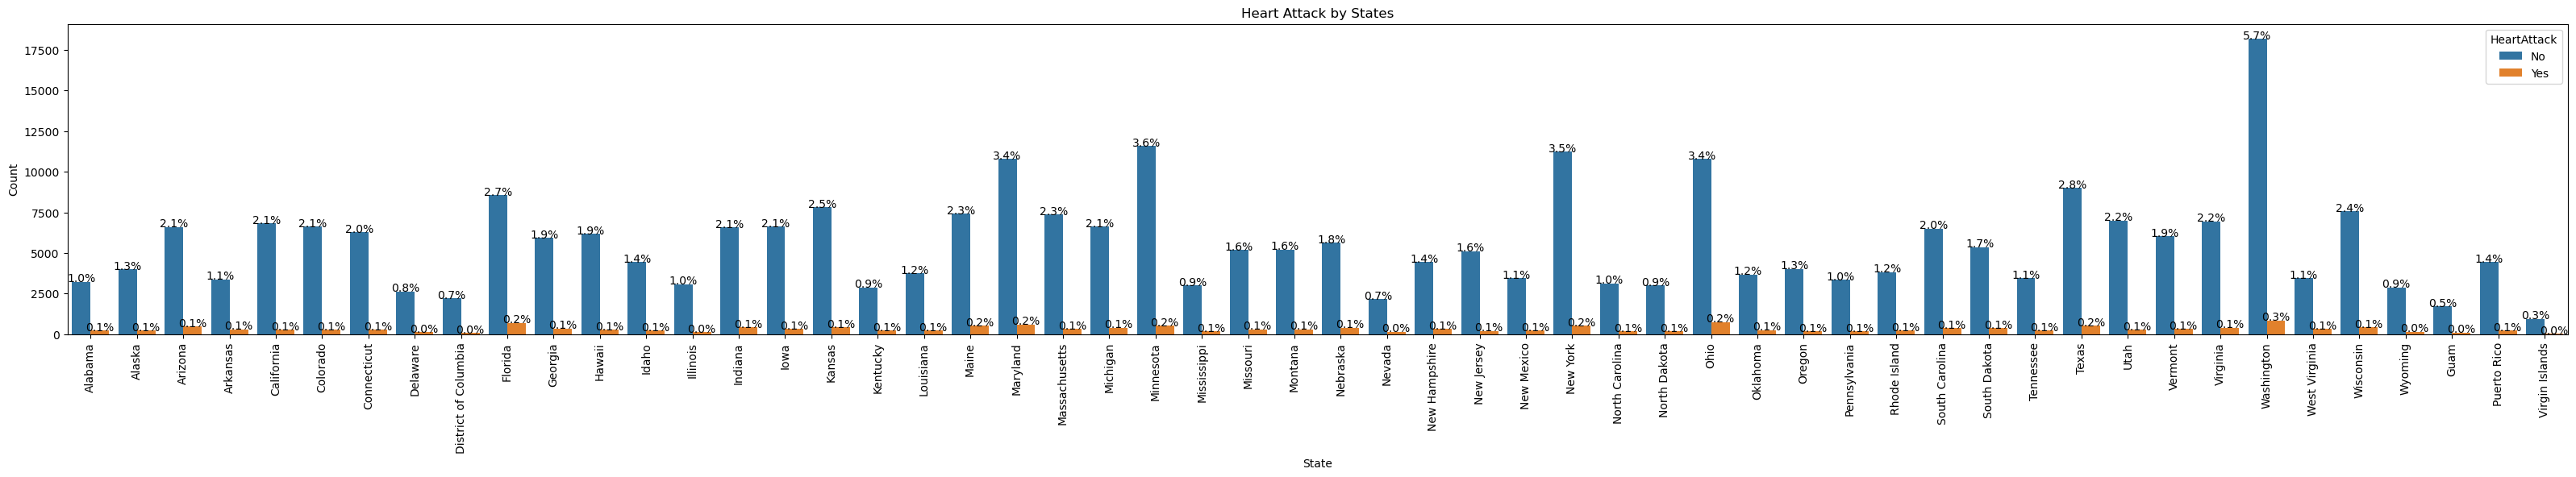

In [180]:
# Set figure styles
plt.figure(figsize=(40,5))

#Plot countplot
ax = sns.countplot(data=df_drop, x="State", hue="HeartAttack")

# Customize plot
ax.set(
    ylabel = "Count",
    title = "Heart Attack by States"
)
ax.tick_params(axis='x', rotation=90, labelsize=10)
# Add labels to bars
total = float(len(df_drop))
for percent in ax.patches:
    height = percent.get_height()
    ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")

# Display the plot
plt.show()

#### Heart Attack by Age Groups

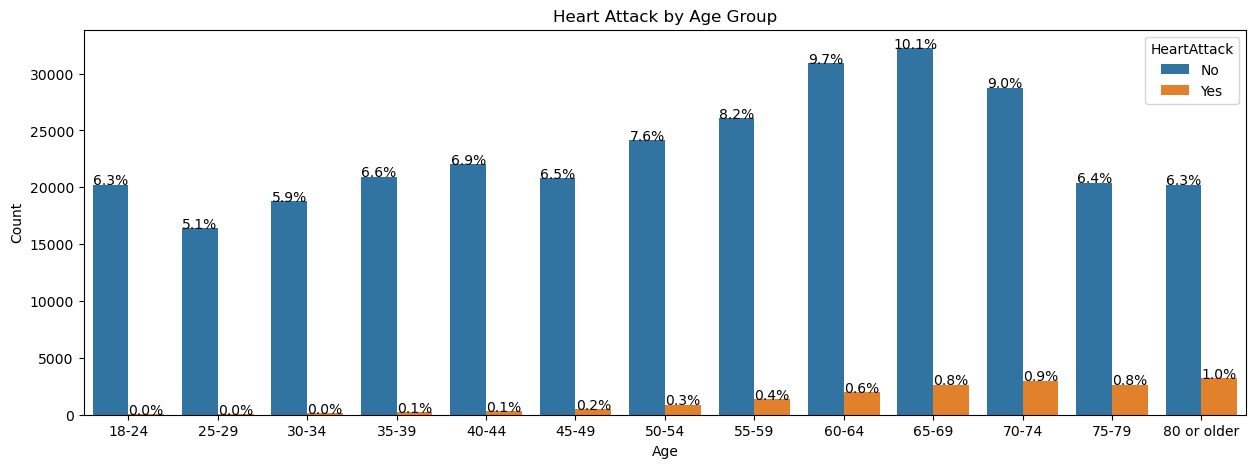

In [181]:
# Set figure styles
plt.figure(figsize=(15,5))

#Plot countplot
ax = sns.countplot(data=df_drop, x="Age", hue="HeartAttack", order = sorted(df_drop["Age"].unique()))

# Customize plot
ax.set(
    ylabel = "Count",
    title = "Heart Attack by Age Group"
)
ax.tick_params(axis='x', labelsize=10)
# Add labels to bars
total = float(len(df_drop))
for percent in ax.patches:
    height = percent.get_height()
    ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")

# Display the plot
plt.show()

#### Heart Attack by Race

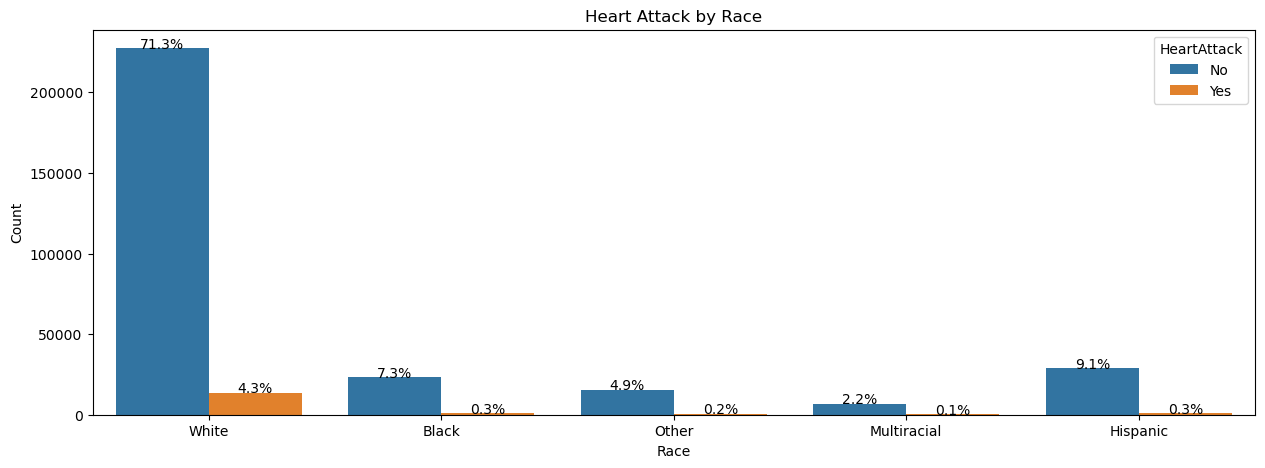

In [182]:
# Set figure styles
plt.figure(figsize=(15,5))

#Plot countplot
ax = sns.countplot(data=df_drop, x="Race", hue="HeartAttack")

# Customize plot
ax.set(
    ylabel = "Count",
    title = "Heart Attack by Race"
)
ax.tick_params(axis='x', labelsize=10)
# Add labels to bars
total = float(len(df_drop))
for percent in ax.patches:
    height = percent.get_height()
    ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")

# Display the plot
plt.show()

#### Heart Attack by Other Categorical Features

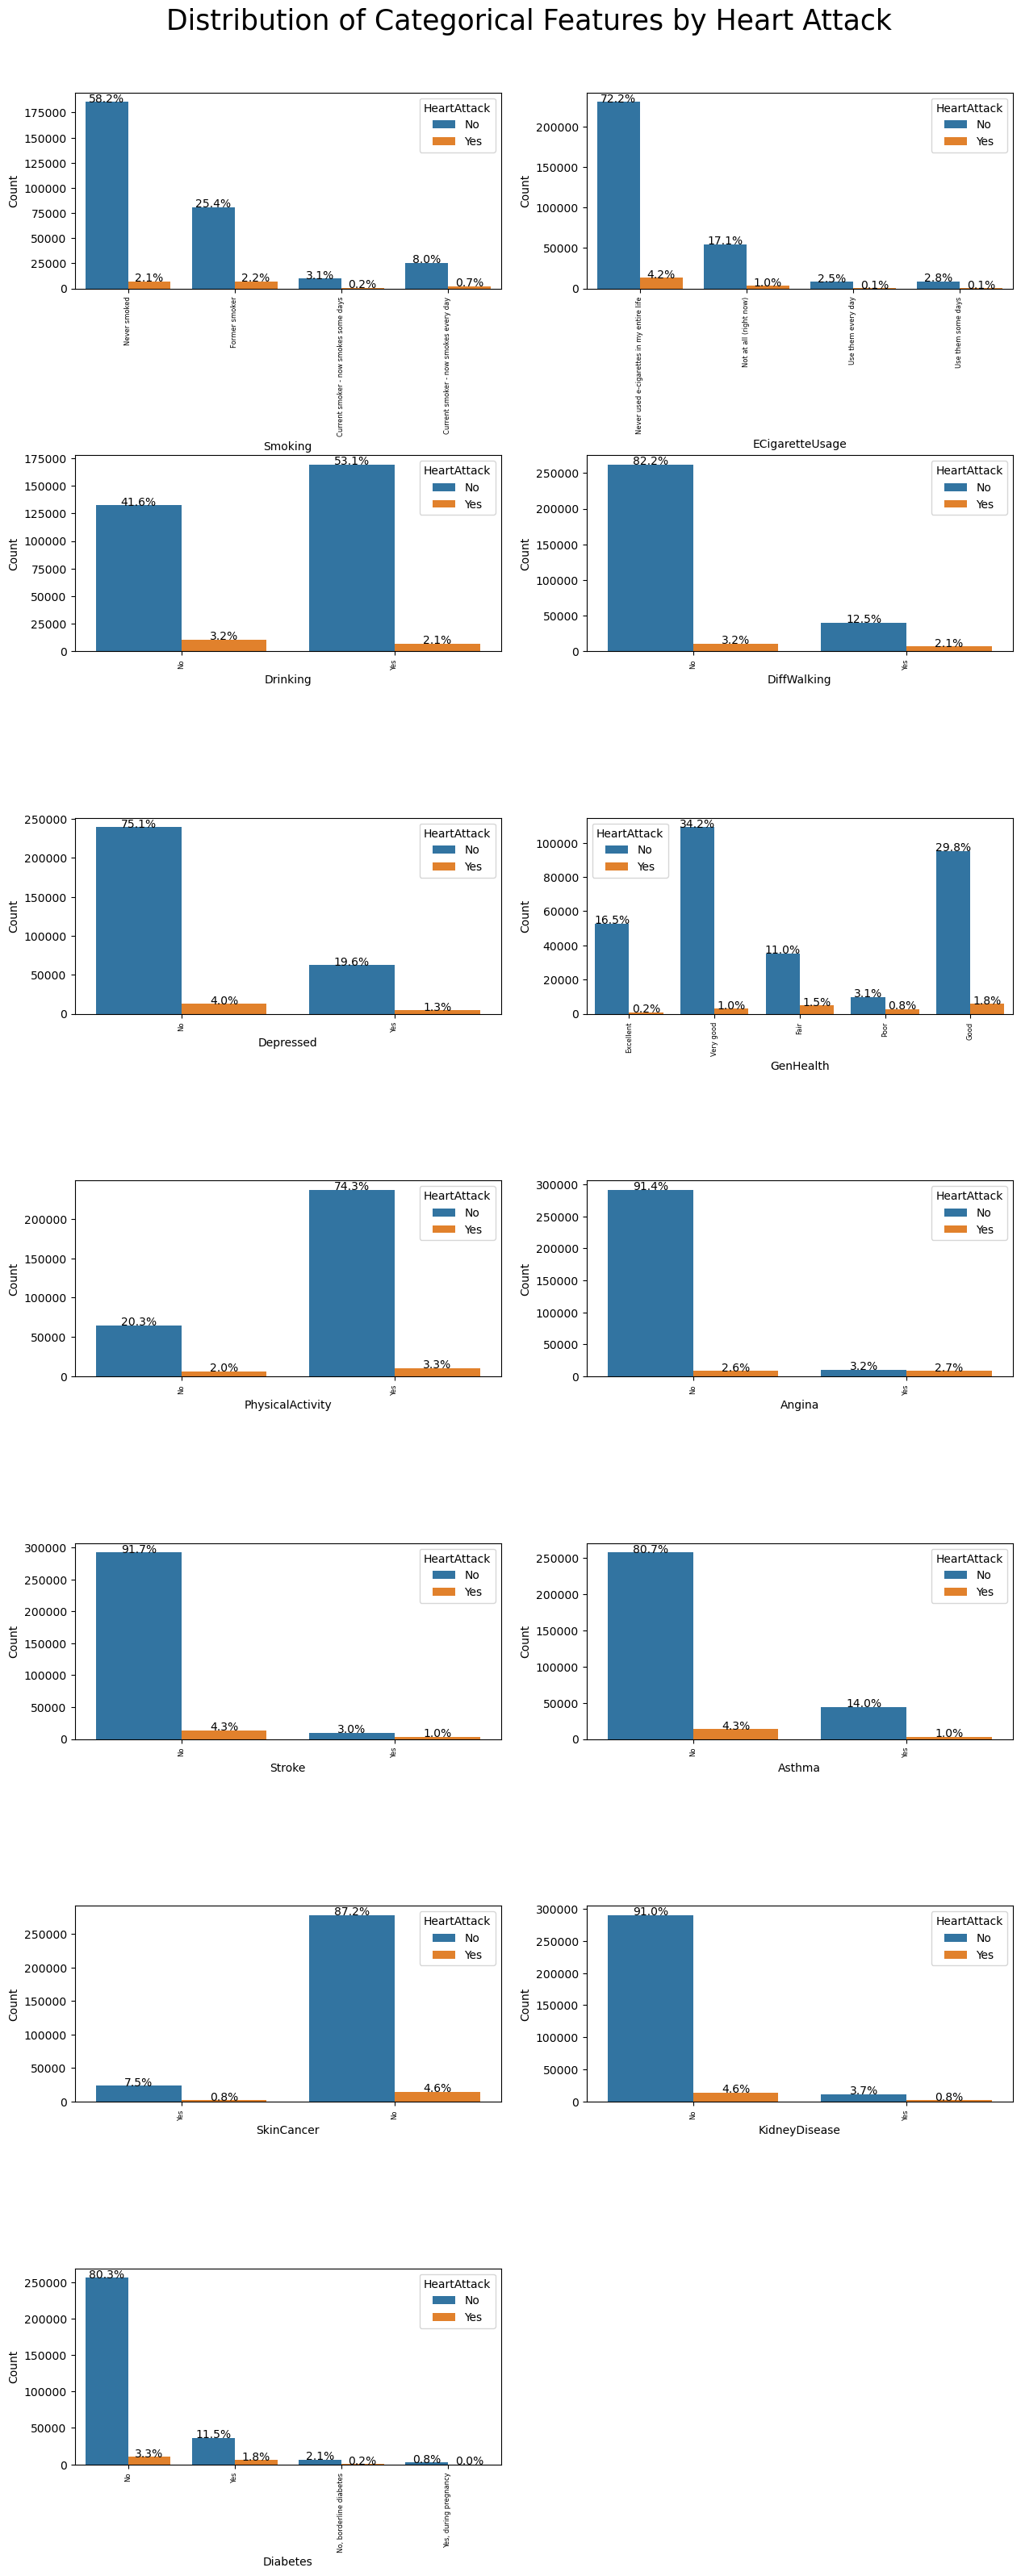

In [167]:
risk_cols = ['Smoking', 'ECigaretteUsage', 'Drinking', 'DiffWalking', 'Depressed', 
             'GenHealth', 'PhysicalActivity', 'Angina', 'Stroke', 'Asthma', 
             'SkinCancer', 'KidneyDisease', 'Diabetes'] 
# Determin the number of rows and columns
L = len(risk_cols)
ncol = 2
nrow = int(np.ceil(L / ncol)) # Calculates the number of rows needed to fit all categorical columns

# Create Subplots
fig, axs = plt.subplots(nrow, ncol, figsize=(15, 5 * nrow))
# Adjust the spacing of the subplots
fig.subplots_adjust(top=0.95, hspace=0.85, wspace=0.2)

for i, col in enumerate(risk_cols):
    ax = axs[i // ncol, i % ncol] # determines the row & determines the column, respectively
    sns.countplot(data=df_drop, x=col, hue="HeartAttack", ax=ax)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    ax.tick_params(axis='x', rotation=90, labelsize=6)

    # Add labels to bars
    total = float(len(df_drop))
    for percent in ax.patches:
        height = percent.get_height()
        ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")

# Hide the last subplot if the number of columns is odd    
if L % 2 != 0:
    axs[-1, -1].axis('off')

plt.suptitle('Distribution of Categorical Features by Heart Attack', fontsize=25)
plt.show()

# Training Model